<a href="https://colab.research.google.com/github/Ugo-Ogbodo/Personal_learns/blob/main/DLMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/udacity/deep-learning-v2-pytorch.git

Cloning into 'deep-learning-v2-pytorch'...
remote: Enumerating objects: 1719, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1719 (delta 0), reused 3 (delta 0), pack-reused 1713
Receiving objects: 100% (1719/1719), 148.76 MiB | 24.97 MiB/s, done.
Resolving deltas: 100% (826/826), done.
Checking out files: 100% (271/271), done.


In [2]:
cd deep-learning-v2-pytorch/

/content/deep-learning-v2-pytorch


In [3]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5)),
                                ])
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


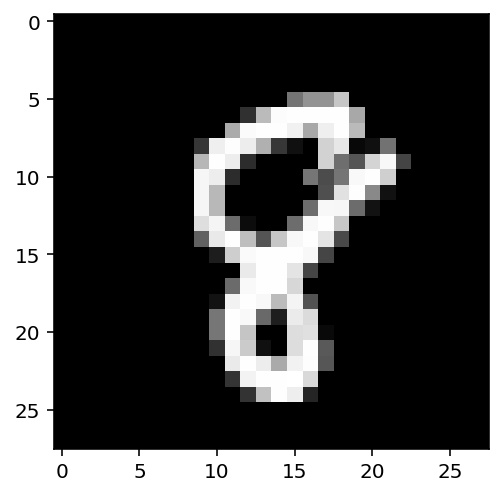

In [6]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [7]:
def activation(x):
  return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1) 
#the first part reshape the array, the second part flatens the image
#this can also be achieved by replacing -1 by 784

w1 = torch.randn(784, 256)
b1 = torch.randn(256)
w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
output = torch.mm(h, w2) + b2
print(output.shape)

torch.Size([64, 10])


#implementing softmax

In [8]:
#implementing softmax
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1)
#torch.sum(torch.exp(x), dim=1) this takes the sum across one dimmension
#.view reshapes the tensor to 64 rows

probabilities = softmax(output)

print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


#using nn module

In [9]:
#using nn module to build networks
from torch import nn

In [10]:
class Ugo(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)
    
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim = 1)

    def forward(self, x):
      x = self.hidden(x)
      x = self.sigmoid(x)
      x = self.output(x)
      x = self.softmax(x)

      return x

In [11]:
model = Ugo()
model

Ugo(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

#using functional#

In [12]:
import torch.nn.functional as F

class Ugo(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784, 256)
    self.output = nn.Linear(256, 10)

  def forward(self, x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim=1)

    return x

In [13]:
class Ugo(nn.Module):
  def __init__(self):
    super().__init__()

    self.hidden = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    self.output = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.hidden(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.softmax(self.output(x), dim=1)

    return x

#back propagation and losses

In [14]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))
#the loss
criterion = nn.CrossEntropyLoss()

images, labels = next(iter(trainloader))
#flaten or reshape the image
images = images.view(images.shape[0], -1)

#forward pass, get our logits
logits = model(images)
#calculating the loss
loss = criterion(logits, labels)
print(loss)

tensor(2.3301, grad_fn=<NllLossBackward0>)


In [15]:
#from torch.nn.modules.activation import LogSoftmax
#using log_softmax
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
#flaten or reshape the image
images = images.view(images.shape[0], -1)

#forward pass, get our logits
logits = model(images)
#calculating the loss
loss = criterion(logits, labels)
print(loss)

tensor(2.3462, grad_fn=<NllLossBackward0>)


#Autograd(backpropagation)


In [16]:
x =torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-1.5540, -0.7407],
        [ 1.7860,  0.2509]], requires_grad=True)


In [17]:
y = x**2
print(y)

tensor([[2.4149, 0.5486],
        [3.1898, 0.0629]], grad_fn=<PowBackward0>)


In [18]:
print(y.grad_fn)

In [19]:
z = y.mean()
print(z)

tensor(1.5541, grad_fn=<MeanBackward0>)


In [20]:
print(x.grad)

None


In [21]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.7770, -0.3703],
        [ 0.8930,  0.1254]])
tensor([[-0.7770, -0.3703],
        [ 0.8930,  0.1254]], grad_fn=<DivBackward0>)


#loss and autograd

In [22]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
#flaten or reshape the image
images = images.view(images.shape[0], -1)

logps = model(images)
#calculating the loss
loss = criterion(logps, labels)

In [23]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() 
print('After backward pass \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass 
 tensor([[ 0.0030,  0.0030,  0.0030,  ...,  0.0030,  0.0030,  0.0030],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006]])


#using optimizers

In [24]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [25]:
print('Initial weights -', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

optimizer.zero_grad()
output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights - Parameter containing:
tensor([[-0.0076, -0.0286, -0.0289,  ..., -0.0014, -0.0292,  0.0088],
        [-0.0308,  0.0330,  0.0151,  ..., -0.0241,  0.0029,  0.0234],
        [-0.0185,  0.0095, -0.0023,  ...,  0.0335,  0.0241, -0.0296],
        ...,
        [ 0.0064,  0.0201,  0.0202,  ..., -0.0168,  0.0098,  0.0315],
        [ 0.0038,  0.0194,  0.0144,  ..., -0.0133, -0.0148, -0.0352],
        [ 0.0243,  0.0170,  0.0127,  ..., -0.0151,  0.0029,  0.0122]],
       requires_grad=True)
Gradient - tensor([[-0.0058, -0.0058, -0.0058,  ..., -0.0058, -0.0058, -0.0058],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0035,  0.0035,  0.0035,  ...,  0.0035,  0.0035,  0.0035],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007]])


In [26]:
optimizer.step()
print('Updated weights -', model[0].weight)

Updated weights - Parameter containing:
tensor([[-0.0076, -0.0285, -0.0288,  ..., -0.0014, -0.0292,  0.0089],
        [-0.0308,  0.0329,  0.0151,  ..., -0.0241,  0.0029,  0.0233],
        [-0.0185,  0.0095, -0.0023,  ...,  0.0335,  0.0241, -0.0296],
        ...,
        [ 0.0064,  0.0201,  0.0202,  ..., -0.0167,  0.0098,  0.0315],
        [ 0.0038,  0.0194,  0.0143,  ..., -0.0133, -0.0149, -0.0352],
        [ 0.0243,  0.0170,  0.0127,  ..., -0.0151,  0.0029,  0.0122]],
       requires_grad=True)


In [27]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.03)

epochs = 5
for e in range (epochs):
  running_loss = 0
  for images , labels in trainloader:
    images = images.view(images.shape[0], -1)

    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f"training loss: {running_loss/len(trainloader)}")

training loss: 0.6152843367983537
training loss: 0.2820921702933972
training loss: 0.21206425810292331
training loss: 0.17025076446415327
training loss: 0.14351145679683192


In [31]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2022-09-05 05:18:49--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.1’

helper.py.1         100%[===================>]   2.75K  --.-KB/s    in 0s      

2022-09-05 05:18:49 (38.9 MB/s) - ‘helper.py.1’ saved [2813/2813]



In [32]:
import importlib
importlib.reload(helper)

<module 'helper' from '/content/deep-learning-v2-pytorch/helper.py'>

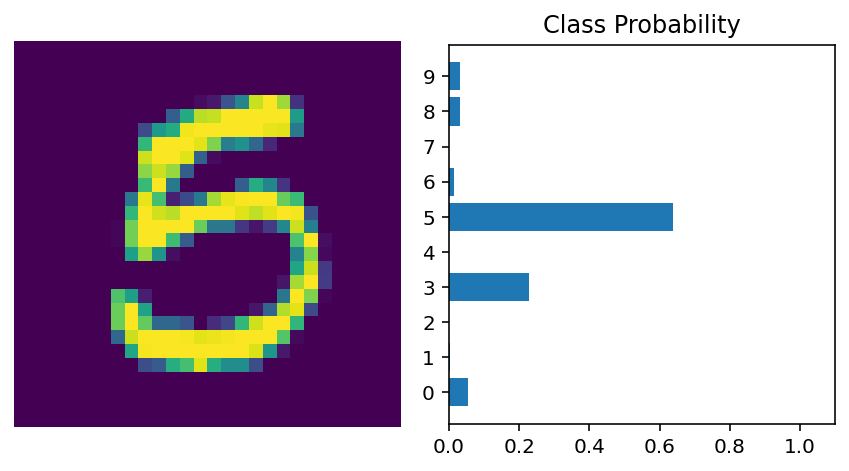

In [33]:
import helper
images, labels = next(iter(trainloader))

img = images[0].view(1,784)
with torch.no_grad():
  logits = model.forward(img)

ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)